<a href="https://colab.research.google.com/github/Jai11Saxena/Navigating_Activity_Cliffs_with_Neural_Combinatorial_Optimization/blob/main/Navigating_Activity_Cliffs_with_Neural_Combinatorial_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚡ **Neural Combinatorial Optimization**

▶ Neural Combinatorial Optimization for well-known NP Hard Problems like Graph Edit Distance and Graph Matching.

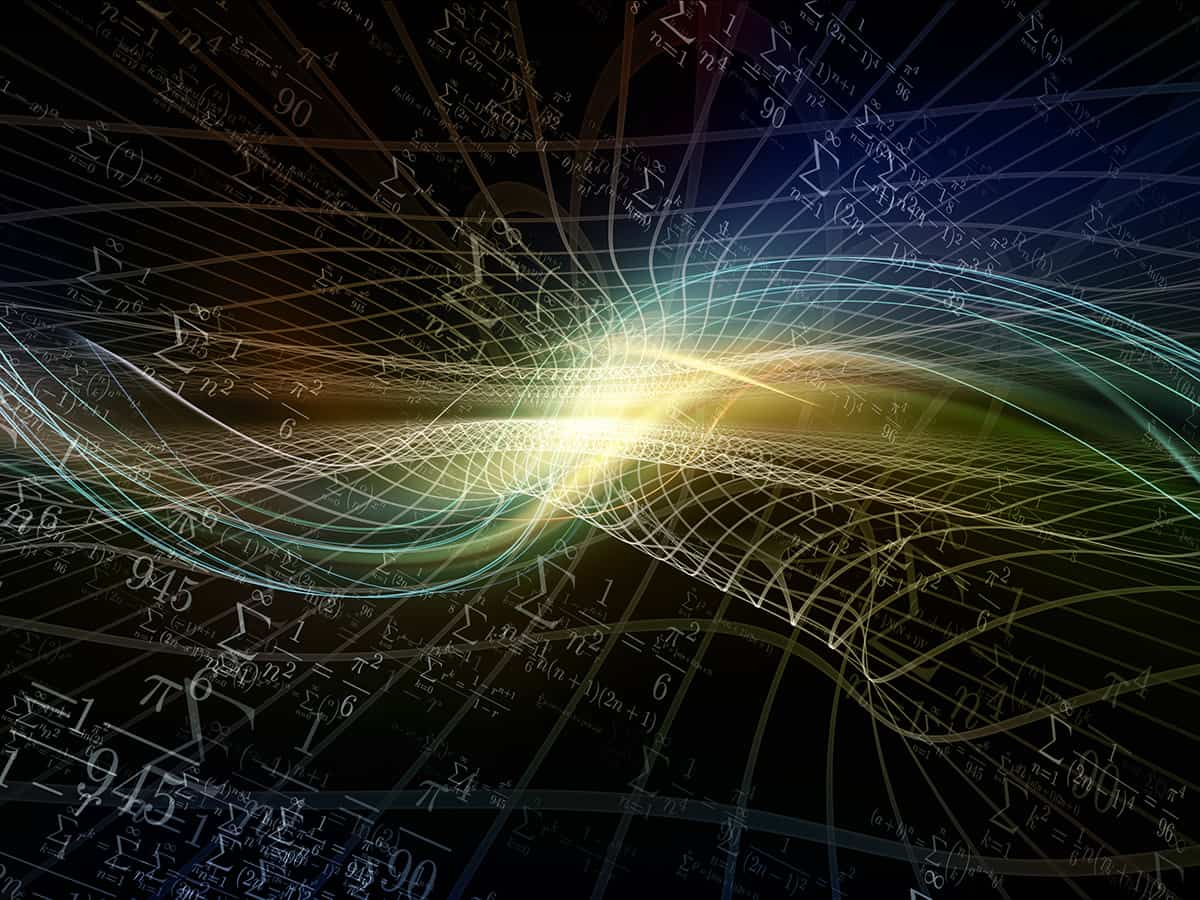

⌨ *Colaboraters:*

*Vatsal Sorathiya*

*Mohit Kumar*

*Jai Saxena*

***Graph Edit Distance***

**Activity Cliffs Analysis**

In [ ]:
!pip install rdkit
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 41.5 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import random

# Define a list of SMILES strings from dataset for compounds
d= pd.read_excel('smile_not.xlsx')
smiles_list=[]
activity_values = []

for i in range(20):
    smiles_list.append(str(d["name"][i]))

# Function to create a NetworkX graph from an RDKit molecule
def molecule_to_graph(mol):
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), atomic_number=atom.GetAtomicNum())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtom().GetIdx(), bond.GetEndAtom().GetIdx(), bond_type=bond.GetBondType())
    return G

# Convert SMILES strings to RDKit molecules and create NetworkX graphs
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
graphs = [molecule_to_graph(mol) for mol in molecules]

# Calculate Graph Edit Distance between all pairs of compounds
ged_matrix = []
for i in range(len(smiles_list)):
    row = []
    for j in range(len(smiles_list)):
        ged = nx.graph_edit_distance(graphs[i], graphs[j])
        row.append(ged)
    ged_matrix.append(row)

# Print the GED matrix
print("\nGraph Edit Distance Matrix:")
print(" ")
for row in ged_matrix:
    print(row)

# Neural Combinatorial Optimization (NCO) Model
class NCOModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NCOModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, input_data):
        x = torch.relu(self.fc1(input_data))
        x = torch.sigmoid(self.fc2(x))
        return x

# Convert GED matrix to a tensor
ged_tensor = torch.tensor(ged_matrix, dtype=torch.float32)

# Set activity values
for i in range(20):
    random_number = round(random.uniform(0.2, 0.8), 1)
    activity_values.append(random_number)
    activities = torch.tensor(activity_values, dtype=torch.float32).view(-1, 1)

# Instantiate the NCO model
input_size = len(smiles_list)
hidden_size = 16
output_size = 1
model = NCOModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(ged_tensor)
    loss = criterion(output, activities)
    loss.backward()
    optimizer.step()

# Get the final predictions
predictions = model(ged_tensor)
print(" ")
print("\nNCO Predictions:")
print(" ")
print(predictions)

# Activity Cliff Analysis between specified pairs
pairs_to_analyze = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19),
(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19),
(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19),
(3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19),
(4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19),
(5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19),
(6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19),
(7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19),
(8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (8, 19),
(9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19),
(10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19),
(11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 18), (11, 19),
(12, 13), (12, 14), (12, 15), (12, 16), (12, 17), (12, 18), (12, 19),
(13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (13, 19),
(14, 15), (14, 16), (14, 17), (14, 18), (14, 19),
(15, 16), (15, 17), (15, 18), (15, 19),
(16, 17), (16, 18), (16, 19),
(17, 18), (17, 19),
(18, 19)]
print(" ")
print("\nActivity Cliff Analysis:")
print(" ")
for pair in pairs_to_analyze:
    i, j = pair
    print(f"Activity cliff between compounds {i+1} and {j+1} (GED={ged_matrix[i][j]}), Predicted Activity Difference: {abs(predictions[i] - predictions[j])}")

# Visualize the molecular structures
for mol in molecules:
    Draw.MolToImage(mol).show()



Graph Edit Distance Matrix:
 
[0.0, 0.0, 2.0, 2.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 4.0, 6.0, 6.0, 9.0, 8.0, 6.0, 8.0, 8.0, 11.0]
[0.0, 0.0, 2.0, 2.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 4.0, 6.0, 6.0, 9.0, 8.0, 6.0, 8.0, 8.0, 11.0]
[2.0, 2.0, 0.0, 0.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 7.0, 6.0, 4.0, 6.0, 6.0, 9.0]
[2.0, 2.0, 0.0, 0.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 7.0, 6.0, 4.0, 6.0, 6.0, 9.0]
[5.0, 5.0, 3.0, 3.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 1.0, 3.0, 3.0, 6.0, 5.0, 3.0, 5.0, 5.0, 8.0]
[4.0, 4.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 5.0, 4.0, 2.0, 4.0, 4.0, 7.0]
[4.0, 4.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 5.0, 4.0, 2.0, 4.0, 4.0, 7.0]
[4.0, 4.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 5.0, 4.0, 2.0, 4.0, 4.0, 7.0]
[4.0, 4.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 5.0, 4.0, 2.0, 4.0, 4.0, 7.0]
[5.0, 5.0, 3.0, 3.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 1.